In [110]:
import requests
import config
import json
import matplotlib.pyplot as plt
from Data_Crawler import Data_Crawler

TOKEN = config.access_token

headers ={
      'Authorization': 'token '+ TOKEN, # replace <TOKEN> with your token
    }

In [85]:
# collect data by users API
# Gets first interval

id_ = 0
response_1 = requests.get('https://api.github.com/users?since='+str(id_),headers=headers)
data_1 = response_1.json()

In [7]:
# First attempt to get the maximum user ID

response_last = requests.get('https://api.github.com/search/users?q=created:2021-02-20',headers=headers)
data_2 = response_last.json()

In [28]:
# Potential maximum user ID

data_2['items'][29]['id']

79367051

In [40]:
# A second attempt to get the maximum user ID

late_id = data_2['items'][29]['id'] + 3000
response_later = requests.get('https://api.github.com/users?since='+str(late_id),headers=headers)
data_last = response_later.json()

In [42]:
# Potential maximum user ID

data_last[29]['id']

79370081

In [47]:
#Gets our estimated maximum user ID

late_id_2 = data_2['items'][29]['id'] + 30154
response_later_2 = requests.get('https://api.github.com/users?since='+str(late_id),headers=headers)
data_last_2 = response_later_2.json()

In [49]:
# Estimated maximum user ID

data_last_2[29]['id']

79370081

In [94]:
# Sets up our data crawler and sets some variables to prepare for crawling Github
# Note: we already sampled the first interval above, so we use that sample here to save time and space

data_crawler = Data_Crawler()
num_sampled_intervals = 1
interval_length = data_crawler.extract_length(data_1)
num_of_responses = data_crawler.extract_number_of_response(data_1)


ratio = interval_length / num_of_responses
next_interval = data_crawler.calculate_next_interval(ratio, data_1[num_of_responses-1]['id'])

In [101]:
sum_of_ratios = ratio

In [100]:
sum_of_interval_lengths

46

In [83]:
num_of_responses

30

In [95]:
next_interval

153379.33333333334

In [ ]:
last_accessed_value = 0

In [61]:
sum_of_ratios

NameError: name 'sum_of_ratios' is not defined

In [165]:
next_interval

79583859.0

In [166]:
num_sampled_intervals

767

In [167]:
interval_range = 79370081

estimator = ((last_accessed_value/num_sampled_intervals)*sum_of_ratios)
estimator

82447663.91186447

In [168]:
last_accessed_value

79483859

In [170]:
# Sets up our data crawler and sets some variables to prepare for crawling Github
# Note: we already sampled the first interval above, so we use that sample here to save time and space

data_crawler = Data_Crawler(2)
num_sampled_intervals_2 = 1
interval_length_2 = data_crawler.extract_length(data_1)
num_of_responses_2 = data_crawler.extract_number_of_response(data_1)
density = num_of_responses_2 / interval_length_2
last_accessed_value_2 = data_1[num_of_responses_2-1]['id']
next_interval_2 = last_accessed_value_2 + 90000
sum_of_densities = density

In [79]:
# Here is where we run requests to the Search API. Only 60 requests can be sent per hour, so we only iterate through 60 times as a result. We rerun this loop each hour to obtain our sampled data.

for x in range(60):
    data_response_2 = data_crawler.sample(round(next_interval_2))
    if data_response_2 == []: # If we are at the end of user ID space
        break
    else:
        interval_length_2 = data_crawler.extract_length(data_response_2)
        num_of_responses_2 = data_crawler.extract_number_of_response(data_response_2)
        density = num_of_responses_2 / interval_length_2 # Calculates the density of the interval
        last_accessed_value_2 = data_response_2[num_of_responses_2-1]['id']
        next_interval_2 = data_crawler.calculate_next_interval(last_accessed_value_2, 90000)
        sum_of_densities += density
        num_sampled_intervals_2 += 1

In [80]:
interval_range = 79370081 # For finding the actual estimations, we use 79617050 at the end once we have the true maximum
data_crawler.estimate(sum_of_densities, num_sampled_intervals_2, interval_range)

76269087.32445037

In [81]:
# We print out the follow couple of lines and record each of the values

sum_of_densities

1152.1550003459868

In [82]:
num_sampled_intervals_2

1199

In [83]:
last_accessed_value_2

79618050

In [139]:
# We build an array that stores the number of intervals at each record instance

m = []
for x in range(20):
    m.append((x+1)*60+1)

In [144]:
# This array stores the calculated estimations at each recorded instance

estimations = [75913853,72150919,73231452,74043796,74409946,74517864,74785746,75032647,75234496,75430572,75597162,75754864,75897411,75988850,76136948,76121899,76241497,76337876,76430328,76507369]

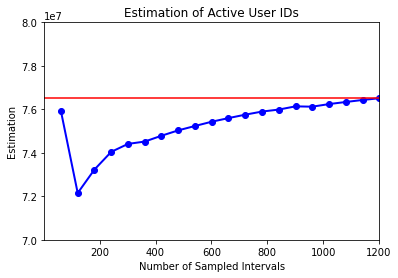

In [151]:
# Here, we plot the sample size against the estimation
plt.plot(m, estimations, color='blue', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=6) 
  
# setting x and y axis range 
plt.ylim(70000000,80000000) 
plt.xlim(1,1200) 

plt.xlabel('Number of Sampled Intervals') 
plt.ylabel('Estimation') 
plt.title('Estimation of Active User IDs')


# This plots our ground truth line
x = [0,1200]
y = [76507369,76507369]

plt.plot(x,y, color='red') 
plt.show() 